# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur adjoint au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>

# Devoir 2 - Régression linéaire ( 15 points )

Le présent devoir concerne les notions de la régression linéaire vues au Chapitre 2 du cours. Pour ce devoir, vous devez élaborer une analyse complète de régression à l'exercice 1 pour répondre aux questions de l'exercice 2.


## Devoir effectué par

JALBERT, JONATHAN - MATRICULE728

**Déclaration d’intégrité relative au plagiat**

Nous certifions sur l’honneur :
- Que les résultats décrits dans ce rapport sont l’aboutissement de notre travail.
- Que nous sommes les auteurs de ce rapport.
- Que nous n'avons pas utilisé des sources ou résultats tiers sans clairement les citer et les référencer selon les règles bibliographiques préconisées.

Nous déclarons que ce travail ne peut être soupçonné de plagiat.





# Contexte : Valeur de revente des voitures

Dans ce devoir, on s'intéresse au prix de vente des voitures usagées en fonctions de plusieurs caractéristiques. 

Le jeu de données *cardata.csv* compilé en 2019 contient les informations suivantes pour chaque voitures usagées :

- Price : le prix de revente de la voiture en pourcentage du prix d'achat ;
- Year : l'année de la voiture ;
- Km : le kilométrage de la voiture ;
- Fuel : le type de carburant utilisée (Pétrol, Diesel, Gaz naturel comprimé) ;
- Seller : le type de vendeur (individu ou concessionnaire) ;
- Transmission : le type de transmission de la voiture (automatique ou manuel)
- PreviousOwner : le nombre de propriétaires de la voiture avant le propriétaire actuel.


# Consignes

- Le devoir doit être remis sur Moodle **avant 23h59 le mardi 29 septembre 2020.** Les retards ne seront pas tolérés car le solutionnaire sera publié dès mercredi.
- Le devoir a une pondération de 15%.
- Écrivez vos noms et vos matricules dans l'espace prévu à cet effet de cette cellule.
- Vous pouvez compléter le devoir en équipe de deux personnes. Dans ce cas, un seul fichier par équipe doit être remis. Pour vous aider à trouver un coéquipier, le canal de discussion *#trouver_un_coéquipier* a été créé sur Slack.
- Le devoir doit être complété dans le présent calepin Jupyter en ajoutant autant de cellules de texte et de code que nécessaires. Vous remettrez ce fichier en format *.ipynb*. Le nom du fichier doit être *matricule1_matricule2_devoir2.ipynb*.
- N'utilisez que les librairies introduites à la cellule suivante.
- L'exercice 1 est volontairement laissé en format libre. Vous avez la liberté de laisser aller votre créativité pour construire votre modèle de régression linéaire. 

## Chargement des libairies

In [1]:
using Combinatorics    # Pour l'énumération de toutes les possibilités
using CSV              # Pour la manipulation des fichiers CSV
using DataFrames       # Pour l'utilisation des DataFrame
using Distributions    # Pour l'utilisation des lois de probabilités
using Gadfly           # Pour la création de figures
using LinearAlgebra    # Pour l'utilisation de fonctions d'algèbre linéaire
using Statistics       # Pour l'utilisation de fonctions statistiques de bases  

## Chargement des données

In [2]:
data = CSV.read("cardata.csv")
first(data, 10)

,Price,Year,Km,Fuel,Seller,Transmission,PreviousOwner
,Float64,Int64,Int64,String,String,String,Int64
1,0.599284,2014,27000,Petrol,Dealer,Manual,0
2,0.497904,2013,43000,Diesel,Dealer,Manual,0
3,0.736041,2017,6900,Petrol,Dealer,Manual,0
4,0.686747,2011,5200,Petrol,Dealer,Manual,0
5,0.669578,2014,42450,Diesel,Dealer,Manual,0
6,0.940997,2018,2071,Diesel,Dealer,Manual,0
7,0.831281,2015,18796,Petrol,Dealer,Manual,0
8,0.754936,2015,33429,Diesel,Dealer,Manual,0
9,0.984252,2016,20273,Diesel,Dealer,Manual,0


# Exercice 1 - Modèle de régression linéaire ( 10 points )

Dans ce premier exercice, élaborez un modèle de régression permettant de modéliser le prix de revente des voitures (Price) en fonction des variables explicatives. Pour obtenir votre modèle final, je vous propose d'effectuer les étapes suivantes mais pas nécessairement dans cet ordre :

 - Vérifier la présence de multicolinéarité dans les variables explicatives.
 - Effectuer une transformation des variables si nécessaire.
 - Sélectionner le meilleur sous-ensemble de variables explicatives.
 - Vérifier s'il y a présence de valeurs abérantes nuisant à l'estimation des paramètres.
 - Vérifier si les hypothèses de la régression sont satisfaites.
 
Vous devez présenter et justifier votre modèle final sans nécessairement détailler toutes les étapes intermédiaires. Par exemple, si une transformation des variables s'avérait nécessaire, présentez seulement la transformation finale et pas toutes celle que vous avez essayé. Simplement mentionnez les autres transformations essayées et expliquez pourquoi vous les avez écarté. 

Gardez en tête que le correcteur doit pouvoir suivre votre raisonnement sans se perdre dans les détails. 

## 1.1 Analyse exploratoire 

Pas obligatoire. Je fais toujours ça pour cerner le jeu de données avant de commencer la modélisation.

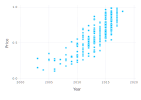

In [3]:
plot(data, x=:Year, y=:Price, Geom.point)

L'année semble définitivement avoir une influence sur la valeur de revente.

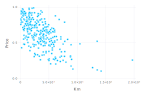

In [4]:
plot(data, x=:Km, y=:Price, Geom.point)

Le kilométrage semble définitivement avoir une influence sur la valeur de revente. Il y a quelques points extrêmes pour lesquels la valeur de revente est élevée même si le kilométrage est grand. Ce n'est cependant que très peu de points.

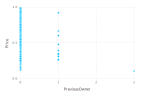

In [5]:
plot(data, x=:PreviousOwner, y=:Price, Geom.point)

Difficile de conclure avec ce graphique si le nombre de propriétaires avant l'actuel est un facteur important. On voit qu'il y a une relation mais on ne peut pas statuer sur son importance.

In [ ]:
df = by(data, :Fuel, :Price => mean)

La valeur de revente semble différente pour les différents types de carburants. Il est impossible de conclure pour le moment si ces différences sont significatives.

In [ ]:
df = by(data, :Transmission, :Price => mean)

A priori, la valeur de revente ne semble pas influencée par le type de transmisison de la voiture.

## 1.2 Modèle avec toutes les variables explicatives

Les variables qualitatives *Fuel*, *Seller*, *Transmission* et *Transmission* sont encodées avec des variables indicatrices.

In [ ]:
y = data.Price
n = length(y)

x₁ = data.Year
x₂ = data.Km

x₃ = zeros(n)
x₄ = zeros(n)
x₃[ data.Fuel .== "Diesel" ] .= 1
x₄[ data.Fuel .== "CNG" ] .= 1

x₅ = zeros(n)
x₅[ data.Seller .== "Individual" ] .=1

x₆ = zeros(n)
x₆[ data.Transmission .== "Automatic"] .=1

x₇ = data.PreviousOwner

X = hcat(ones(n), x₁, x₂, x₃, x₄, x₅, x₆, x₇)


## 1.3 Vérification de la multicolinéarité

Avec la matrice de structure précédemment construite, on vérifie s'il y a présence de multicolinéarité. 

La fonction `compute_VIF()` est reprise du TD4.


In [ ]:
function compute_VIF(structureMatrix::Array{T,2} where T<:Real)
    
    n, m = size(structureMatrix)
    
    p = m-1  # nb de variables explicatives
    
    VIF = Float64[]
    
    for j in 2:m
       
        y = structureMatrix[:,j]
        X = structureMatrix[:, setdiff(1:m, j)]
        
        β̂ = X\y
        
        e = y - X*β̂
        
        SST = sum( (y .- mean(y)).^2)
        SSE = e'e
        
        R² = 1 - SSE/SST
        
        push!(VIF, 1/(1-R²))
        
    end
    
    return VIF
    
end

VIF = compute_VIF(X)


Puisque tous les VIF sont inférieurs à 10, il n'y a pas de multicolinéarité.

## 1.4 Vérification des hypothèses

In [ ]:
β̂ = X\y
ŷ = X*β̂
e = ŷ - y

plot(x=ŷ, y=e, Geom.point, Guide.xlabel("ŷ"), Guide.ylabel("e"))

Le nuage de points est acceptable. 

Il y a néanmoins un groupe de 8 points plus problématiques en bas à gauche.  On pourrait éventuellement faire une analyse de valeurs suspectes pour voir si ces points peuvent être ignorés. Je propose plutôt de conserver ces 8 points tel quel parce que justement, ils ne constituent que 8 valeurs questionnables sur les 299 analysées.

## 1.5 Sélection du meilleur modèle

On parcourt les 64 modèles possibles pour déterminer lequel a le coefficient de détermination ajusté le plus élevé.

In [ ]:
SST = sum( (y .- mean(y)).^2)

df = DataFrame( Variables = Array{String}[], R²_aj = Float64[])

varnames = names(data)[2:end]

for v in combinations(varnames)
    
    X = ones(n)
    
    if any(v .== "Year")
        X = hcat(X, x₁)
    end
    
    if any(v .== "Km")
        X = hcat(X, x₂)
    end
    
    if any(v .== "Fuel")
        X = hcat(X, x₃, x₄)
    end
    
     if any(v .== "Seller")
        X = hcat(X, x₅)
    end
    
     if any(v .== "Transmission")
        X = hcat(X, x₆)
    end
    
    if any(v .== "PreviousOwner")
        X = hcat(X, x₇)
    end
    
    p = length(v)
    
    β̂ = X\y
    
    e = y - X*β̂
    SSE = e'e
    
    R²_aj = 1 - (n-1)/(n-p) * SSE/SST
    
    push!(df, [v, R²_aj])
    
end

sort(df, :R²_aj, rev=true)

J'ai trouvé que le modèle utilisant les variables "Year", "Km", "Fuel" et "PreviousOwner" correspond au modèle avec le plus grand coefficient de détermination ajusté.

## 1.6 Construction du modèle sélectionné

Construction de la matrice de structure du modèle sélectionné et calcul des quantités d'intérêts.

In [ ]:
X = hcat(ones(n), x₁, x₂, x₃, x₄, x₇)
p = 4

β̂ = X\y

e = ŷ - y
SSE = e'e

σ̂²  = SSE/(n-p-1)

# Exercice 2 - Exploitation du modèle ( 5 points )

Utilisez le modèle développé à l'exercice 1 pour répondre aux questions suivantes.

## a) Quel est le facteur qui déprécie le plus la valeur de revente d'une voiture ? 

Justifiez bien votre réponse.

Les variables explicatives ne sont pas toutes à la même échelle et en plus, certaines d'entre elles sont qualitatives. C'est pourquoi j'utilise ici le zcore tel que vu dans le TD3.

In [ ]:
V = inv(X'X)
zscore = β̂ ./ sqrt.(σ̂²*diag(V))

En valeur absolue, l'année de la voiture correspond au zscore le plus élevé. On peut donc conclure que l'âge de la voiture est le facteur de dépréciation le plus important d'une voiture.

## b) Quelle est la dépréciation moyenne de la valeur de revente d'une voiture en fonction de son âge ? Obtenez également un intervalle de confiance à 90% de cette quantité.

Dans mon approche, j'ai directement encodé l'année de la voiture comme variable explicative. J'ai obtenu que β̂₁ = 17. Cela signifie que la valeur de revente d'une voiture augmente en moyenne de 17% en fonction de l'année du modèle. 

En terme d'âge, c'est l'opposé. Une voiture perd en moyenne 17 % de sa valeur à chaque année de vie supplémentaire.

**Note :** Il aurait aussi été possible d'implémenter l'âge de la voiture comme variable explicative au lieu de l'année du modèle.

In [ ]:
# Calculons l'intervalle de confiance sur le coefficients β₁

α = .1
q = quantile(TDist(n-p-1),1-α/2)

se = q * sqrt(σ̂² * V[2,2])

a = round(β̂[2] - se, digits=3)
b = round(β̂[2] + se, digits=3)

println("β₁ ∈ [$a , $b]")


## c) Est-ce que le type de carburant utilisée par la voiture influence la valeur de revente ? Le cas échéant, classez les carburants selon la valeur de revente moyenne.

Justifiez bien votre réponse.

La variable "Fuel"est présente dans le meilleur modèle. Alors le type de carburant influence la valeur de revente d'une voiture.

J'ai encodé la variable carburant de la façon suivante :

    x₃   x₄   Carburant
    -------------------
    0    0    Petrol
    1    0    Diesel
    0    1    CNG
    
    
et j'ai obtenu les estimations suivantes pour les coefficients de régression β̂₃ = 3.8 et β̂₄ = -1.0. Par rapport au pétrole, le diésel augmente en moyenne de 3.8 % la valeur de revente d'une voiture et le gaz naturel diminue la valeur de revente de 1 % en moyenne.

Si on classe les types de carburants en fonction des valeurs de revente les plus élevés, on trouve que le calssement suivant :

1. Diésel
2. Pétrol
3. Gaz naturel